#                                                        *FLOOD PREDICTION*

# *LIBRARIES*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# *LOADING DATA*

In [2]:
df_train=pd.read_csv(r"C:\Users\apoor\Downloads\train.csv (1)\train.csv")
df_test= pd.read_csv(r"C:\Users\apoor\Downloads\test.csv\test.csv")
df_train

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


In [3]:
df_train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [4]:
df_test.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [5]:
df_train.shape, df_test.shape

((1117957, 22), (745305, 21))

In [6]:
# Reduce to 1 lakh rows (random sample)
reduced_df = df_train.sample(n=100000, random_state=42)
reduced_test = df_test.sample(n=100000,  random_state=42)

In [7]:
# Save reduced dataset 
reduced_df.to_csv("train_reduced.csv", index=False)
reduced_test.to_csv("test_reduced.csv", index=False)
print("Original shape:", df_train.shape)
print("Reduced shape:", reduced_df.shape)
print("Original shape:", df_test.shape)
print("Reduced shape:", reduced_test.shape)

Original shape: (1117957, 22)
Reduced shape: (100000, 22)
Original shape: (745305, 21)
Reduced shape: (100000, 21)


# *EDA(Exploratory Data Analysis)*

In [8]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1105809 to 978884
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               100000 non-null  int64  
 1   MonsoonIntensity                 100000 non-null  int64  
 2   TopographyDrainage               100000 non-null  int64  
 3   RiverManagement                  100000 non-null  int64  
 4   Deforestation                    100000 non-null  int64  
 5   Urbanization                     100000 non-null  int64  
 6   ClimateChange                    100000 non-null  int64  
 7   DamsQuality                      100000 non-null  int64  
 8   Siltation                        100000 non-null  int64  
 9   AgriculturalPractices            100000 non-null  int64  
 10  Encroachments                    100000 non-null  int64  
 11  IneffectiveDisasterPreparedness  100000 non-null  int64  
 12  D

In [9]:
reduced_df.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [10]:
reduced_df.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000
mean,5.600484e+05,4.916160,4.922930,4.958090,4.948170,4.948420,4.932920,4.954680,4.927750,4.937640,...,4.953780,4.945170,4.930970,4.923010,4.927450,4.919470,4.95913,4.941870,4.93923,0.504340
std,3.227589e+05,2.054978,2.097364,2.078248,2.058525,2.084347,2.055622,2.088164,2.069457,2.078729,...,2.068286,2.088025,2.078987,2.083604,2.064938,2.068881,2.07484,2.082502,2.09402,0.051001
min,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.285000
25%,2.807292e+05,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,...,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,3.000000,3.00000,0.470000
50%,5.611830e+05,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.00000,0.505000
75%,8.396632e+05,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.00000,0.540000
max,1.117951e+06,16.000000,17.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,...,17.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.00000,0.725000


In [11]:
reduced_df.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [12]:
reduced_df.drop(['id'],axis=1 , inplace= True)

In [13]:
reduced_df.head(1)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
1105809,7,5,8,4,8,4,8,4,3,7,...,5,7,4,7,2,3,6,7,2,0.56


In [14]:
reduced_df.duplicated()

1105809    False
442591     False
5434       False
82966      False
584893     False
           ...  
799810     False
590085     False
195329     False
325727     False
978884     False
Length: 100000, dtype: bool

In [15]:
reduced_df.corr()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
MonsoonIntensity,1.000000,-0.003857,-0.006391,-0.009162,-0.014952,-0.010921,-0.005789,-0.007068,-0.004246,-0.001420,...,-0.017038,-0.009419,-0.007169,-0.008045,-0.016445,-0.008889,-0.010420,-0.009053,-0.012288,0.186448
TopographyDrainage,-0.003857,1.000000,-0.010290,-0.004362,-0.012237,-0.004419,-0.010367,-0.006308,-0.006715,-0.009171,...,-0.013479,-0.011775,-0.011056,-0.010252,-0.009493,-0.009586,-0.013383,-0.016379,-0.012638,0.188762
RiverManagement,-0.006391,-0.010290,1.000000,-0.009488,-0.010555,-0.003198,-0.002097,-0.009786,-0.014582,-0.012059,...,-0.006481,-0.018311,-0.007518,-0.014292,-0.002321,-0.005276,-0.005958,-0.012065,-0.012307,0.188644
Deforestation,-0.009162,-0.004362,-0.009488,1.000000,-0.014537,-0.007332,-0.009538,-0.007741,-0.006796,-0.014960,...,-0.012523,-0.012801,-0.006876,-0.010797,-0.007858,-0.012711,-0.007286,-0.007503,-0.007987,0.187378
Urbanization,-0.014952,-0.012237,-0.010555,-0.014537,1.000000,-0.004815,-0.007487,-0.013109,-0.005324,-0.010595,...,-0.018048,-0.018869,-0.014894,-0.009061,-0.012561,-0.016769,-0.010504,-0.011362,-0.017031,0.176400
ClimateChange,-0.010921,-0.004419,-0.003198,-0.007332,-0.004815,1.000000,-0.008233,-0.005187,-0.006977,-0.012722,...,-0.005292,-0.011318,-0.012924,-0.012765,-0.008045,-0.007144,-0.014387,-0.010972,-0.012502,0.190926
DamsQuality,-0.005789,-0.010367,-0.002097,-0.009538,-0.007487,-0.008233,1.000000,-0.011146,-0.005401,-0.012235,...,-0.010353,-0.010483,-0.017389,-0.007713,-0.016132,-0.011338,-0.010389,-0.009078,-0.010402,0.190360
Siltation,-0.007068,-0.006308,-0.009786,-0.007741,-0.013109,-0.005187,-0.011146,1.000000,-0.011847,-0.006607,...,-0.010742,-0.006948,-0.010503,-0.009182,-0.003642,-0.005724,-0.013639,-0.013649,-0.009125,0.190590
AgriculturalPractices,-0.004246,-0.006715,-0.014582,-0.006796,-0.005324,-0.006977,-0.005401,-0.011847,1.000000,-0.008390,...,-0.007513,-0.011407,-0.016449,-0.014345,-0.009984,-0.015129,-0.013684,-0.008588,-0.011549,0.182929
Encroachments,-0.001420,-0.009171,-0.012059,-0.014960,-0.010595,-0.012722,-0.012235,-0.006607,-0.008390,1.000000,...,-0.007767,-0.011565,-0.007351,-0.012558,-0.007771,-0.007395,-0.008664,-0.008158,-0.019624,0.186472


In [16]:
# Function to detect outliers using the IQR method and remove
def remove_outliers(reduced_df):
    for column in reduced_df.select_dtypes(include=['number']).columns:
        Q1 = reduced_df[column].quantile(0.25)
        Q3 = reduced_df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        reduced_df = reduced_df[(reduced_df[column] >= lower_bound) & (reduced_df[column] <= upper_bound)]
   
    return reduced_df

reduced_df = remove_outliers(reduced_df)

# *Data Visualization*

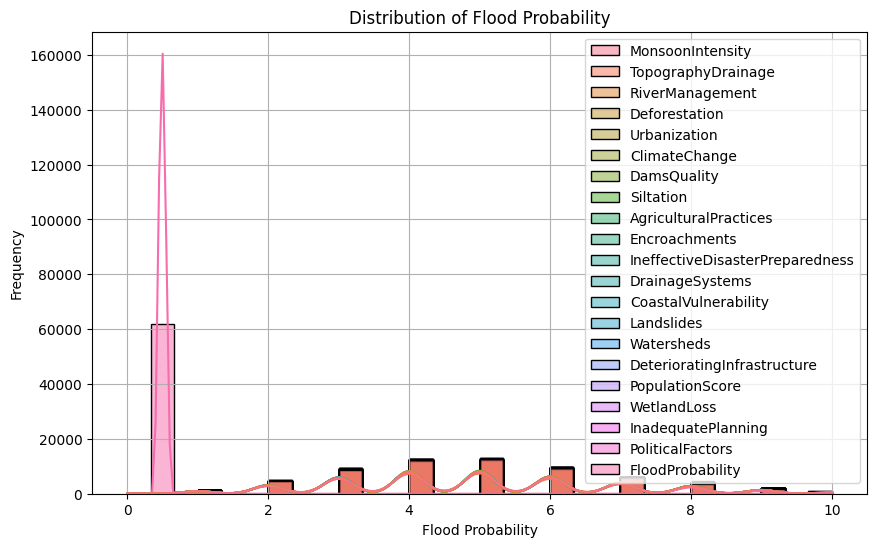

In [17]:
#distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(reduced_df, bins=30, kde=True)
plt.title('Distribution of Flood Probability')
plt.xlabel('Flood Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

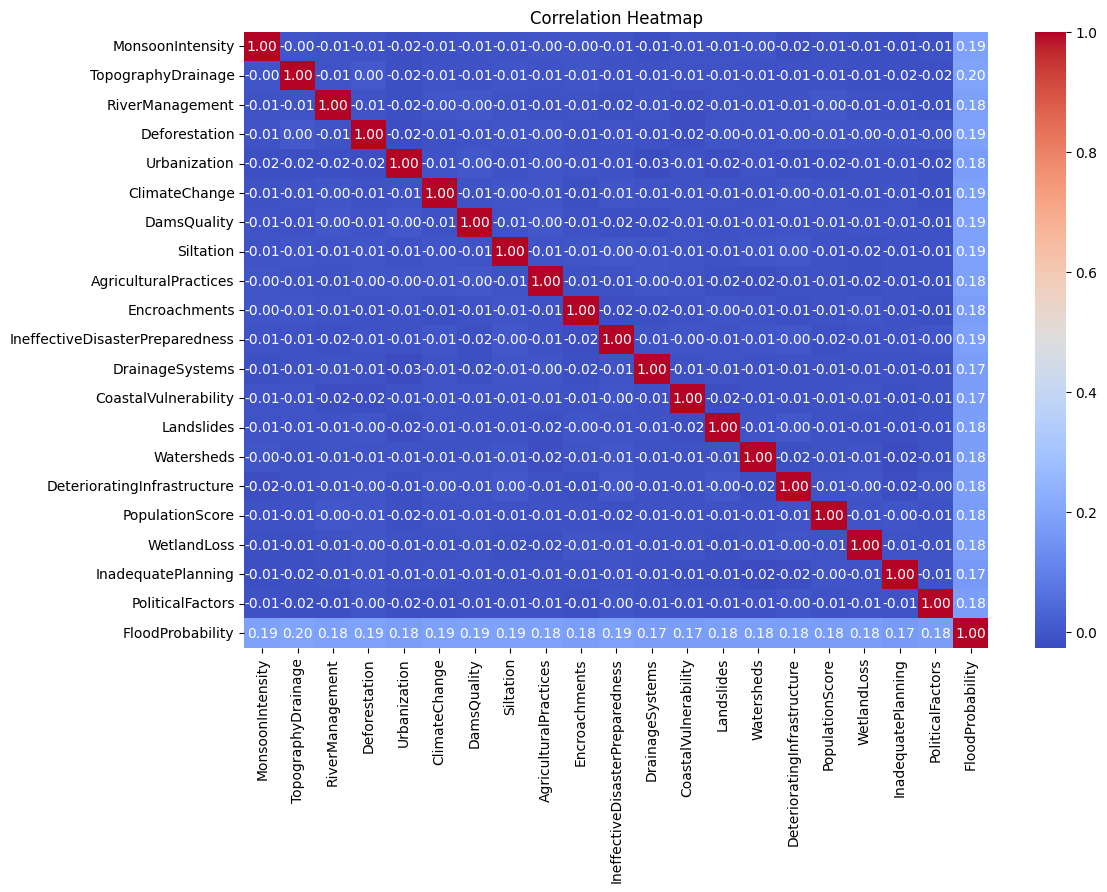

In [18]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = reduced_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# *Modelling*

In [19]:
X = reduced_df.drop('FloodProbability', axis=1)
y = reduced_df['FloodProbability']


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(49561, 20)
(12391, 20)
(49561,)
(12391,)


In [22]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
#linearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
# on training
y_train_pred= lr.predict(X_train)

mse_t=mean_squared_error(y_train_pred, y_train)
rmse_t= mean_squared_error(y_train_pred, y_train)**0.5
mae_t=mean_absolute_error(y_train_pred, y_train)
r2_lin_train= r2_score(y_train, y_train_pred)

print(mse_t)
print(rmse_t)
print(mae_t)
print(r2_lin_train)


0.0004118257750307067
0.020293490952290754
0.016174032750082563
0.8165817405278023


In [25]:
# on testing
y_test_pred= lr.predict(X_test)
mse_test=mean_squared_error(y_test_pred, y_test)
rmse_test= mean_squared_error(y_test_pred, y_test)**0.5
mae_test=mean_absolute_error(y_test_pred, y_test)
r2_lin_test= r2_score(y_test, y_test_pred)

print(mse_test)
print(rmse_test)
print(mae_test)
print(r2_lin_test)

0.00041870926487857726
0.02046238658804435
0.01624184873892943
0.8165977267567086


In [26]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor(max_depth=20,n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, random_state=0)

In [27]:
y_train_forest=forest.predict(X_train)

mse_forest_train=mean_squared_error(y_train_forest, y_train)
rmse_forest_train= mean_squared_error(y_train_forest, y_train)**0.5
mae_forest_train=mean_absolute_error(y_train_forest, y_train)
r2_forest_train= r2_score(y_train, y_train_forest)
print("MSE :", mse_forest_train)
print("RMSE :", rmse_forest_train)
print("MAE :", mae_forest_train)
print("R² Score :", r2_forest_train)

MSE : 0.00013400195138757015
RMSE : 0.011575921189588764
MAE : 0.009530138843938404
R² Score : 0.9403184400307302


In [28]:
# on the test data
y_test_forest = forest.predict(X_test)

mse_forest_test = mean_squared_error(y_test_forest, y_test)
rmse_forest_test = mean_squared_error(y_test_forest, y_test)**0.5
mae_forest_test = mean_absolute_error(y_test_forest, y_test)
r2_forest_test = r2_score(y_test, y_test_forest)
print("Random Forest Test Report:")
print("MSE (Test Data):", mse_forest_test)
print("RMSE (Test Data):", rmse_forest_test)
print("MAE (Test Data):", mae_forest_test)
print("R² Score (Test Data):", r2_forest_test)

Random Forest Test Report:
MSE (Test Data): 0.0009346790504573084
RMSE (Test Data): 0.030572521166192825
MAE (Test Data): 0.025340379552568855
R² Score (Test Data): 0.5905935765322444


In [29]:
# XGBRegressor
import xgboost as xgb
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [30]:
# on training data data
y_train_pred = xg_reg.predict(X_train)

print("XGBoost Training Report:")
print("MAE (Training Data):", mean_absolute_error(y_train, y_train_pred))
print("MSE (Training Data):", mean_squared_error(y_train, y_train_pred))
print("R² Score (Training Data):", r2_score(y_train, y_train_pred))

XGBoost Training Report:
MAE (Training Data): 0.014825628475964798
MSE (Training Data): 0.00035376122752278004
R² Score (Training Data): 0.842442429408071


In [31]:
# on testing data
y_pred_test = xg_reg.predict(X_test)
print("XGBoost Test Report:")
print("MAE (Test Data):", mean_absolute_error(y_test, y_pred_test))
print("MSE (Test Data):", mean_squared_error(y_test, y_pred_test))
print("R² Score (Test Data):", r2_score(y_test, y_pred_test))

XGBoost Test Report:
MAE (Test Data): 0.019164919172646726
MSE (Test Data): 0.0005763291341394673
R² Score (Test Data): 0.7475573573272414


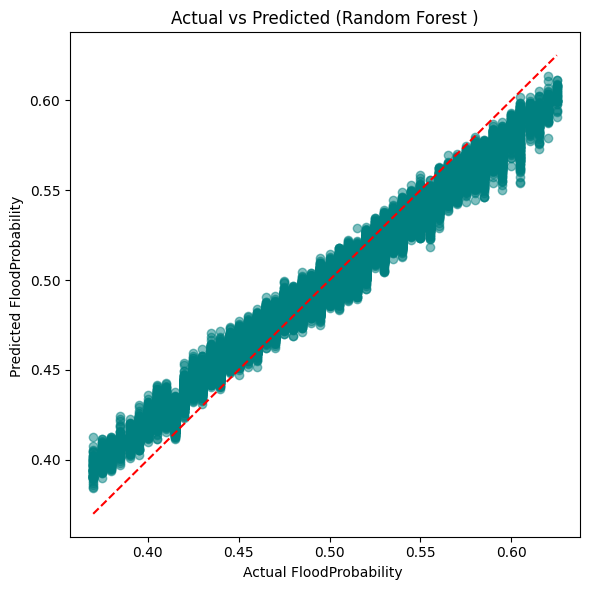

In [32]:
#"Actual vs Predicted (Random Forest)"
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_train_forest, alpha=0.5, color='teal')
plt.xlabel("Actual FloodProbability ")
plt.ylabel("Predicted FloodProbability ")
plt.title("Actual vs Predicted (Random Forest )")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.tight_layout()
plt.show()

In [33]:
import gradio as gr


model = forest 

# Feature names (excluding target 'FloodProbability' if you're predicting it)
features = [
    'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
    'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
    'Siltation', 'AgriculturalPractices', 'Encroachments',
    'IneffectiveDisasterPreparedness', 'DrainageSystems',
    'CoastalVulnerability', 'Landslides', 'Watersheds',
    'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
    'InadequatePlanning', 'PoliticalFactors'
]

# Prediction function using the model
def predict_flood_risk(*inputs):
    input_array = np.array(inputs).reshape(1, -1)
    prediction = model.predict(input_array)[0]
    return f"Predicted Flood Risk Score: {prediction:.2f}"

# Create sliders for all inputs
inputs = [gr.Slider(0, 10, step=1, label=feature) for feature in features]

# Build and launch Gradio interface
demo = gr.Interface(
    fn=predict_flood_risk,
    inputs=inputs,
    outputs="text",
    title="Flood Risk Prediction Interface",
    description="Adjust values between 0 to 10 to predict flood risk using a trained ML model."
)

demo.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
